In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fais apparaitre l'ensemble des informations
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_column", 70)
pd.set_option("display.max_colwidth", 100)

In [3]:
data = pd.read_csv('../data/processed/cleaned_cafe_sales.csv')
data

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_6566716,Coffee,1.0,2.0,2.0,Credit Card,NaN,2023-01-01
1,TXN_1581562,Coffee,2.0,2.0,4.0,Cash,In-store,2023-01-01
2,TXN_2192787,Sandwich,5.0,4.0,20.0,Cash,In-store,2023-01-01
3,TXN_5358805,Coffee,5.0,2.0,10.0,Digital Wallet,NaN,2023-01-01
4,TXN_1604072,Coffee,2.0,2.0,4.0,NaN,NaN,2023-01-01
...,...,...,...,...,...,...,...,...
9995,TXN_9686177,Cake,3.0,3.0,9.0,NaN,In-store,NaN
9996,TXN_5536245,Smoothie,4.0,4.0,16.0,Cash,NaN,NaN
9997,TXN_4659954,NaN,3.0,4.0,12.0,Credit Card,In-store,NaN
9998,TXN_8344810,Smoothie,2.0,4.0,8.0,NaN,NaN,NaN


### Analyse exploratoire sur nos données clean

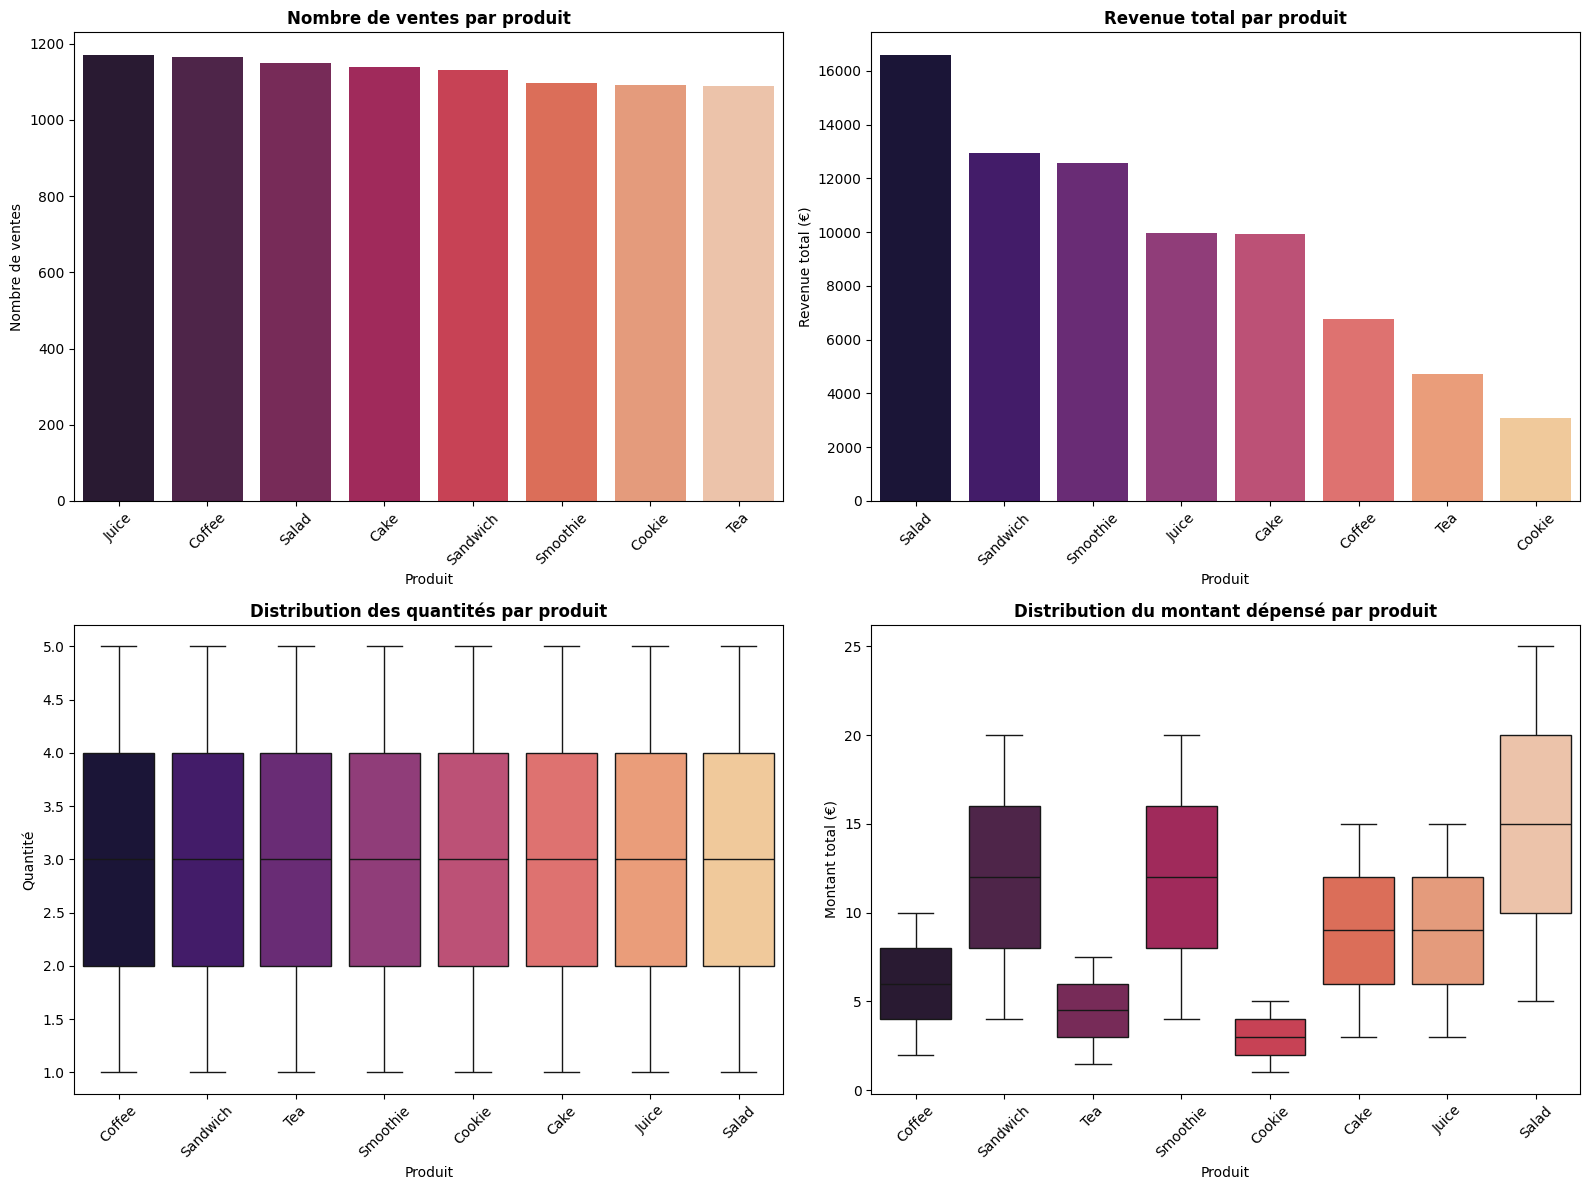

In [4]:
# Vue rapide des ventes par produit

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1-> Nombre de ventes par produit
sales_count = data['Item'].value_counts().sort_values(ascending=False)
sns.barplot(x=sales_count.index, y=sales_count.values, hue=sales_count.index, palette='rocket', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Nombre de ventes par produit', fontweight='bold')
axes[0, 0].set_xlabel('Produit')
axes[0, 0].set_ylabel('Nombre de ventes')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2-> Revenue total par produit
revenue_per_item = data.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_per_item.index, y=revenue_per_item.values, hue=revenue_per_item.index, palette='magma', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Revenue total par produit', fontweight='bold')
axes[0, 1].set_xlabel('Produit')
axes[0, 1].set_ylabel('Revenue total (€)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3-> Distribution des quantités par produit
sns.boxplot(data=data, x='Item', y='Quantity', hue='Item', palette='magma', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Distribution des quantités par produit', fontweight='bold')
axes[1, 0].set_xlabel('Produit')
axes[1, 0].set_ylabel('Quantité')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4-> Distribution du montant dépensé par produit
sns.boxplot(data=data, x='Item', y='Total Spent', hue='Item', palette='rocket', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Distribution du montant dépensé par produit', fontweight='bold')
axes[1, 1].set_xlabel('Produit')
axes[1, 1].set_ylabel('Montant total (€)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<h3>Commentaire :</h3> <br>
Ici une sur les produits: <br>
- Nb de produits vendus <br>
- Les produits qui ont générés le plus de revenues <br>
- Distribution des quantité par produit <br>
- Le montant dépensé par produit <br>

Cela nous donne une visualisation rapide sur les produits du café, lesquels sont plus rentable, lesquels sont le plus vendus, etc...

Total de revenue par produit: Item
Salad       16605
Sandwich    12956
Smoothie    12556
Juice        9984
Cake         9933
Coffee       6784
Tea          4735
Cookie       3070
Name: Total Spent, dtype: int64


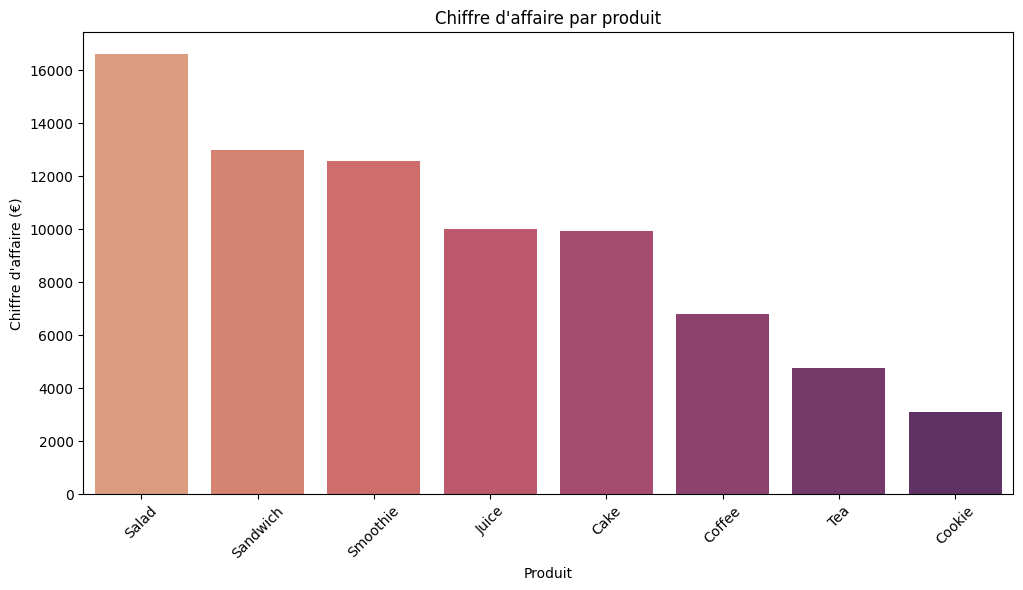

In [5]:
# CA total par produit
revenue = data.groupby('Item')['Total Spent'].sum().astype(int)
revenue = revenue.sort_values(ascending=False)
print(f'Total de revenue par produit: {revenue}')

# Graphique à barres 
plt.figure(figsize=(12,6))
sns.barplot(x=revenue.index, y=revenue.values, hue=revenue.index, palette='flare')
plt.title('Chiffre d\'affaire par produit')
plt.xlabel('Produit')
plt.ylabel('Chiffre d\'affaire (€)')
plt.xticks(rotation=45)
plt.show()

<h3>Commentaire:</h3> <br> 
Ici la salad est le produit qui a rapporté le plus de revenue +16K euros générés. <br>
Le produit qui a gégéné le moins est le cookie puis le thé.

In [6]:

# Quantité total vendue par produit
quantity_sold = data.groupby('Item')['Quantity'].sum().astype(int)
quantity_sold.sort_values(ascending=False)

# Répartition des ventes
quantity_sold_rate = data['Item'].value_counts(normalize=True) * 100
quantity_sold_rate.round(1)

print(f'Quantité totale vendue par produit: {quantity_sold}')

Quantité totale vendue par produit: Item
Cake        3311
Coffee      3392
Cookie      3070
Juice       3328
Salad       3321
Sandwich    3239
Smoothie    3139
Tea         3157
Name: Quantity, dtype: int64


<h3>Commentaire:</h3> <br> 
Ci-dessus on a vu que la salade a généré le plus de recette mais ce n'est pas le produit le plus vendu. <br>
Produit le plus vendus -> Ce sont le café puis le jus.
Les prix de ces boissons ne sont pas très haut c'est pour ça que la salade rapporte le plus de CA.

In [7]:
# Achat moyen par client
avg_purchase = data.groupby('Transaction ID')['Total Spent'].mean()
avg_purchase.mean().astype(int)

print('Panier moyen par client: ', avg_purchase.mean().astype(int), '€')

Panier moyen par client:  8 €


In [8]:
# Moyenne CA par jour
avg_sold_per_day = data.groupby('Transaction Date')['Total Spent'].sum()
avg_sold_per_day.mean().astype(int)

print('Moyenne CA par jour: ', avg_sold_per_day.mean().astype(int), '€')

Moyenne CA par jour:  221 €


In [9]:
# Moyenne de vente effectué par jours
avg_transactions_per_day = data.groupby('Transaction Date')['Transaction ID'].nunique()
avg_transactions_per_day.mean().astype(int)
print('Moyenne de vente effectué par jours: ', avg_transactions_per_day.mean().astype(int))

Moyenne de vente effectué par jours:  26


Répartition des modes de paiement: 
 Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64


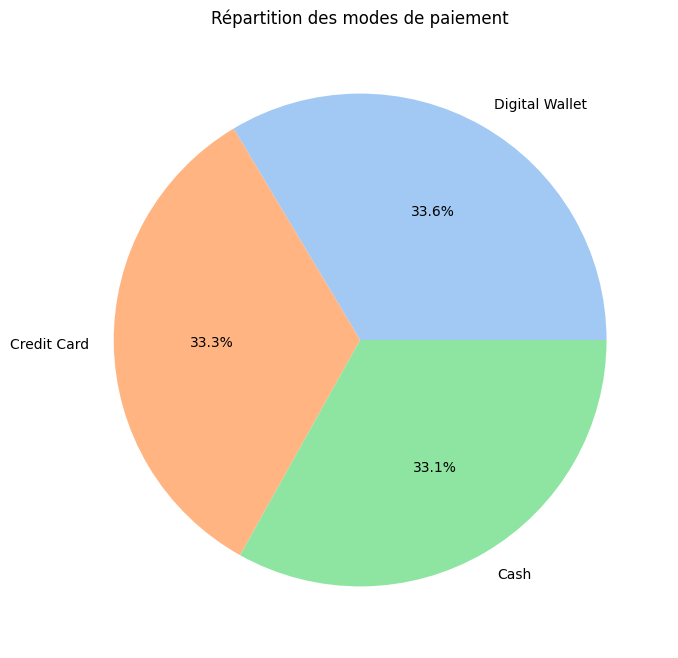

In [10]:
# Répartition des modes de paiement
payment_method = data['Payment Method'].value_counts()
payment_method

# En pourcentage
payment_method_rate = data['Payment Method'].value_counts(normalize=True) * 100
payment_method_rate.round(1)

print(f'Répartition des modes de paiement: \n {payment_method}')

# graphiqu camembert
plt.figure(figsize=(8,8))
plt.pie(payment_method.values, labels=payment_method.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Répartition des modes de paiement')
plt.show()  

<h3>Commentaire:</h3> <br> 
La répartition de moyen de paiement est assez homogène.

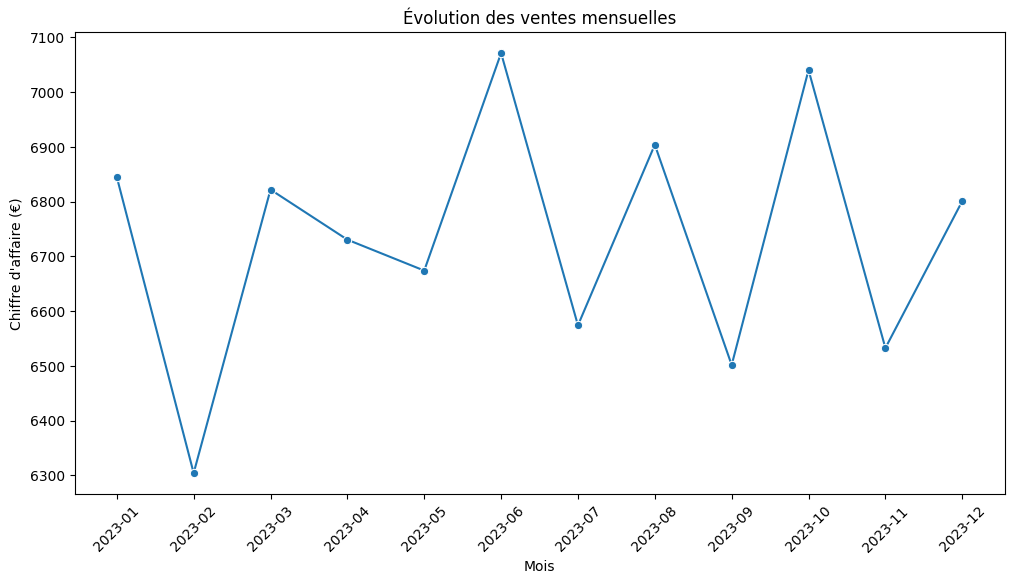

In [11]:
# Evolution ventes au cours du temps par mois

#Sélectionner seulement le mois 
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Month'] = data['Transaction Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total Spent'].sum()
monthly_sales = monthly_sales.sort_index()

# Graphique de l'évolution des ventes mensuelles
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title('Évolution des ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaire (€)')
plt.xticks(rotation=45)
plt.show()


<h3>Commentaire:</h3> <br> 
Deux grosse pic de vente -> En juin et en octobre <br>
Le mois qui a le moins marché est en février


In [12]:
# KPI résumé
print('Résumé des KPIs:')
total_revenue = data['Total Spent'].sum().astype(int)
total_transactions = data['Transaction ID'].nunique()
average_transaction_value = (total_revenue / total_transactions).astype(int)
print(f'Revenu total: {total_revenue} €')
print(f'Nombre total de transactions: {total_transactions}')
print(f'Valeur moyenne des transactions: {average_transaction_value} €')
print(f'Revenu moyen par jour: {avg_sold_per_day.mean().astype(int)} €')
print(f'Moyenne de transactions par jour: {avg_transactions_per_day.mean().astype(int)}')
print(f'Moyenne d\'achat par client: {avg_purchase.mean().astype(int)} €')

Résumé des KPIs:
Revenu total: 84763 €
Nombre total de transactions: 10000
Valeur moyenne des transactions: 8 €
Revenu moyen par jour: 221 €
Moyenne de transactions par jour: 26
Moyenne d'achat par client: 8 €
